In [175]:
import numpy as np
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [176]:
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1]) # create a zero array length 1 + the X's second dimension
        #print("self.w_=" + str(self.w_))
        self.errors_ = []

        for i in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y): # iterate on each row of X and each row of y
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                #print("[" + str(i) + "] :  xi=" + str(xi) + " , target=" + str(target) + ", prediction=" + str(self.predict(xi)) + ", w_=" + str(self.w_))
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        #print("-> " + str(X.shape) + ", " + str(self.w_[1:].shape))
        #print("- " + str(np.dot(X, self.w_[1:])))
        return np.dot(X, self.w_[1:]) + self.w_[0] # matrix multiplication from X and w_[from position 1 to the end] + ...

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [177]:
df = pd.read_csv('iris.data',header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


y[49] : -1
y[50] : -1
y:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]
X type: <class 'numpy.ndarray'>
X[:10,]:
[[ 5.1  1.4]
 [ 4.9  1.4]
 [ 4.7  1.3]
 [ 4.6  1.5]
 [ 5.   1.4]
 [ 5.4  1.7]
 [ 4.6  1.4]
 [ 5.   1.5]
 [ 4.4  1.4]
 [ 4.9  1.5]]
X[4][1]: 1.4


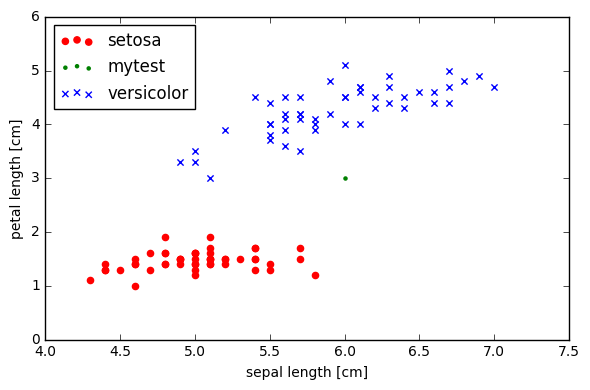

In [178]:
# select only setosa and versicolor from data
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# the first 50 (index 0-49) are Iris-setosa, the other are versicolor
print("y[49] : " + str(y[49]))
print("y[50] : " + str(y[49]))
print("y:\n" + str(y))

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values
print("X type: " + str(type(X[1])))
print("X[:10,]:\n" + str(X[:10,]))
print("X[4][1]: " + str(X[4][1]))

# plot data
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(6, 3, color='green', marker='.', label='mytest')
plt.scatter(X[50:100, 0], X[50:100, 1],color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('./images/02_06.png', dpi=300)
plt.show()

self.w_=[ 0.  0.  0.]
-> (2,), (2,)
- 0.0
-> (2,), (2,)
- -5.594
[0] :  xi=[ 5.1  1.4] , target=-1, prediction=-1, w_=[-0.2  -1.02 -0.28]
-> (2,), (2,)
- -5.39
-> (2,), (2,)
- -5.39
[0] :  xi=[ 4.9  1.4] , target=-1, prediction=-1, w_=[-0.2  -1.02 -0.28]
-> (2,), (2,)
- -5.158
-> (2,), (2,)
- -5.158
[0] :  xi=[ 4.7  1.3] , target=-1, prediction=-1, w_=[-0.2  -1.02 -0.28]
-> (2,), (2,)
- -5.112
-> (2,), (2,)
- -5.112
[0] :  xi=[ 4.6  1.5] , target=-1, prediction=-1, w_=[-0.2  -1.02 -0.28]
-> (2,), (2,)
- -5.492
-> (2,), (2,)
- -5.492
[0] :  xi=[ 5.   1.4] , target=-1, prediction=-1, w_=[-0.2  -1.02 -0.28]
-> (2,), (2,)
- -5.984
-> (2,), (2,)
- -5.984
[0] :  xi=[ 5.4  1.7] , target=-1, prediction=-1, w_=[-0.2  -1.02 -0.28]
-> (2,), (2,)
- -5.084
-> (2,), (2,)
- -5.084
[0] :  xi=[ 4.6  1.4] , target=-1, prediction=-1, w_=[-0.2  -1.02 -0.28]
-> (2,), (2,)
- -5.52
-> (2,), (2,)
- -5.52
[0] :  xi=[ 5.   1.5] , target=-1, prediction=-1, w_=[-0.2  -1.02 -0.28]
-> (2,), (2,)
- -4.88
-> (2,), (2

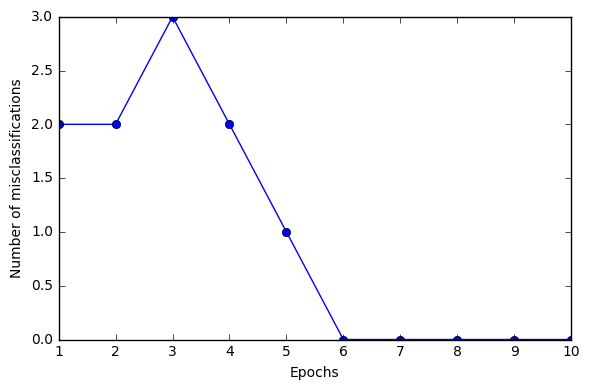

In [179]:
# training the perceorton models
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

print(type(ppn))
print(str(ppn.errors_))

# plot the result
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')

plt.tight_layout()
# plt.savefig('./perceptron_1.png', dpi=300)
plt.show()

In [182]:
X = df.iloc[0:100, [0, 2]].values
X[0:10,]
print("X.shape: " + str(X.shape))
#print(str(X.shape[0]))
#print(str(X.shape[1]))
print("\n")
w = np.zeros(1 + X.shape[1])
print("w.shape: " + str(w.shape))
print("w:\n" + str(w))
w[0] = 0
w[1] = 1
w[2] = 2
print("w:\n" + str(w))

print(str(w[1:]))



X.shape: (100, 2)


w.shape: (3,)
w:
[ 0.  0.  0.]
w:
[ 0.  1.  2.]
[ 1.  2.]


18